In [1]:
# Includes the necessary imports
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Try reading in the data

# Helpful function to read in the data
def readDataByYear(year):
    yearPath = '/Users/zacharyzhu/Desktop/Employment Data/' + str(year) + ' Employment By County.xlsx'
    df = pd.read_excel(yearPath)
    df = df.rename(columns = {"Labor Force Data by County, " + str(year) +  " Annual Averages":"LAUS Code", 
                        "Unnamed: 1": "State FIPS Code", "Unnamed: 2": "County FIPS Code", "Unnamed: 3":
                        "County", "Unnamed: 4": "Year", "Unnamed: 6": "Labor Force",
                        "Unnamed: 7": "Employed", "Unnamed: 8": "Unemployed", "Unnamed: 9": "Unemployment Rate (%)"})
    # Drop blank columns/nonsense rows
    df = df.drop(columns = {'Unnamed: 5'})
    numRows = len(df)
    df = df.drop([0, 1, 2, 3, 4, numRows - 3, numRows - 2, numRows - 1]) # First 5 and last 3 rows are nonsense
    # Split up State/County
    df['State'] = df['County'].str[-2:]
    df['County'] = df['County'].str[:-4]
    # Converting data types into integers
    df['State FIPS Code'] = df['State FIPS Code'].astype(int)
    df['County FIPS Code'] = df['County FIPS Code'].astype(int)
    df['Year'] = df['Year'].astype(int)
    df['Labor Force'] = df['Labor Force'].astype(int)
    df['Employed'] = df['Employed'].astype(int)
    df['Unemployed'] = df['Unemployed'].astype(int)
    df['Unemployment Rate (%)'].astype(int)
    # Accounting for DC
    #df = df['County'].replace({'District of Colu': 'District of Columbia'})
    #df = df['State'].replace({'ia': 'N/A'})

    # Putting data in desired order
    df = df[['LAUS Code', 'State FIPS Code', 'County FIPS Code', 'County', 'State', 'Year', 'Labor Force',
            'Employed', 'Unemployed', 'Unemployment Rate (%)']]
    df['County'].replace({'District of Colu': 'District of Columbia'}, inplace = True)
    df['State'].replace({'ia': 'DC'}, inplace = True)
    return df


In [3]:
# Different functions to parse the data

# Let's say we just wanted to keep California counties
df = readDataByYear(2019)
CACounties = df.loc[df['State'] == 'CA']
#print(CACounties)

# Get a specific row's values
print(df.iloc[0])

# Get a specific column's row's value
print(df['County'].iloc[0])

# Let's say we wanted all counties where the County FIPS Code was divisble by 7 or 9
divBySevNine = df.loc[(df['County FIPS Code'] % 7 == 0) | (df['County FIPS Code'] % 9 == 0)]
#print(divBySevNine)

LAUS Code                CN0100100000000
State FIPS Code                        1
County FIPS Code                       1
County                    Autauga County
State                                 AL
Year                                2019
Labor Force                        26172
Employed                           25458
Unemployed                           714
Unemployment Rate (%)                2.7
Name: 5, dtype: object
Autauga County


In [4]:
# Built-in functions

# Getting mean values of grouping by state
df.count() # Number of non-NaN values in each column
df.sum() # Sum of each column
df.mean() # Mean value of each column
df.describe() # Summary of stats for each column--count, mean, STD, min, median, max

,State FIPS Code,County FIPS Code,Year,Labor Force,Employed,Unemployed
count,3219.000000,3219.000000,3219.0,3.219000e+03,3.219000e+03,3219.000000
mean,31.295744,102.952470,2019.0,5.100236e+04,4.911543e+04,1886.927307
std,16.277202,106.696455,0.0,1.676907e+05,1.613724e+05,6471.804399
min,1.000000,1.000000,2019.0,2.230000e+02,2.120000e+02,4.000000
25%,19.000000,35.000000,2019.0,4.939500e+03,4.698000e+03,200.000000
50%,30.000000,79.000000,2019.0,1.144200e+04,1.099900e+04,479.000000
75%,46.000000,133.000000,2019.0,3.129050e+04,3.002700e+04,1231.000000
max,72.000000,840.000000,2019.0,5.121584e+06,4.894296e+06,227288.000000


In [5]:
stateGrouping = df.groupby(['State']) # Creating a grouping by state
stateGrouping.get_group('WI') # Gives us a sub-table based off of the grouping for WI (the state)
stateGrouping.size() # How many counties exist for each state? N/A represents Washington DC
stateGrouping.mean()

,State FIPS Code,County FIPS Code,Year,Labor Force,Employed,Unemployed
State,,,,,,
AK,2.0,149.655172,2019.0,11992.344828,11256.137931,736.206897
AL,1.0,67.000000,2019.0,33458.985075,32455.029851,1003.955224
AR,5.0,75.000000,2019.0,18168.653333,17523.906667,644.746667
AZ,4.0,13.866667,2019.0,236750.600000,225633.600000,11117.000000
CA,6.0,58.000000,2019.0,334682.379310,321161.706897,13520.672414
CO,8.0,62.234375,2019.0,49199.468750,47845.281250,1354.187500
CT,9.0,8.000000,2019.0,239191.375000,230270.875000,8920.500000
DC,11.0,1.000000,2019.0,409969.000000,387482.000000,22487.000000
DE,10.0,3.000000,2019.0,162421.666667,156281.666667,6140.000000


In [6]:
# Method to generate State aggregated results for a given year

def stateAggregation(year):
    df = readDataByYear(year)
    stateGrouping = df.groupby(['State']) # Creating a grouping by state
    sleuTable = stateGrouping.sum() # Gives STATE, LABOR FORCE, EMPLOYED, UNEMPLOYED
    SFCYearTable = stateGrouping.mean() # Gives state, state FIPS code, and year
    employed = list(sleuTable['Employed']) # Creating total # employed per state column
    unemployed = list(sleuTable['Unemployed']) # Creating total # unemployed per state column
    laborForce = list(sleuTable['Labor Force']) # Creating total # for labor force per state column
    stateFIPSCode = list(SFCYearTable['State FIPS Code']) # State FIPS Code column
    yearColumn = list(SFCYearTable['Year']) # Year--2019
    stateNames = list(stateGrouping.groups.keys()) # Get a list of all state names by using groupby KEYS

    # Get the total unemployment/employment rate
    unemploymentRate = []
    for i in range(len(employed)):
        unemploymentRate.append(unemployed[i]/laborForce[i] * 100)

    # Creating a new table with STATE, FIPS CODE, YEAR, EMPLOYED/UNEMPLOYED/UNEMPLOYMENT RATE

    # One way to create a dataframe

    # df['COL NAME'] = 0 --> Adds/replaces a column in the table with a default value of 0
    stateAggregates = {'State': stateNames, 'State FIPS Code': stateFIPSCode, 'Year': yearColumn,
                       'Total Employed': employed, 'Total Unemployed': unemployed, 
                       'Total Labor Force': laborForce, 'Unemployment Rate (%)': unemploymentRate}
    stateDF = pd.DataFrame(stateAggregates)
    stateDF['Year'] = stateDF['Year'].astype(int) # Making more readable form
    stateDF['State FIPS Code'] = stateDF['State FIPS Code'].astype(int) # Again, State FIPS code was an integer
    return stateDF

stateDF = stateAggregation(2019)
stateDF

,State,State FIPS Code,Year,Total Employed,Total Unemployed,Total Labor Force,Unemployment Rate (%)
0,AK,2,2019,326428,21350,347778,6.138974
1,AL,1,2019,2174487,67265,2241752,3.000555
2,AR,5,2019,1314293,48356,1362649,3.548676
3,AZ,4,2019,3384504,166755,3551259,4.695659
4,CA,6,2019,18627379,784199,19411578,4.039852
5,CO,8,2019,3062098,86668,3148766,2.752443
6,CT,9,2019,1842167,71364,1913531,3.729440
7,DC,11,2019,387482,22487,409969,5.485049
8,DE,10,2019,468845,18420,487265,3.780284
9,FL,12,2019,10016069,320693,10336762,3.102451


In [7]:
# Check to make sure no issues arise for any year
def everyYearAggregates():
    for i in range(1990, 2020):
        stateDF = stateAggregation(i)
        sortedStates = stateDF.sort_values(by = 'Unemployment Rate (%)', ascending = True)

#everyYearAggregates()


In [8]:
# Tasks to work around with going forward
#everyYearAggregates()

'''
1. What is the general trend for each state/the country as a whole in terms of employment/unemployment?
    - Give good economic explanations for each year
2. Which states have been performing better? Which worse?
    - Again, is there a general trend there? Rural vs. urban, manufacturing vs. service, etc.
3. How does the size of the labor force in a county relate to the unemployment rate, if at all?
'''


'\n1. What is the general trend for each state/the country as a whole in terms of employment/unemployment?\n    - Give good economic explanations for each year\n2. Which states have been performing better? Which worse?\n    - Again, is there a general trend there? Rural vs. urban, manufacturing vs. service, etc.\n3. How does the size of the labor force in a county relate to the unemployment rate, if at all?\n'

In [9]:
'''
IMPORTANT NOTE

I manually deleted some of the "data" from 2005/2006 because select LA counties had no data at all.
To reference the original data (which includes the counties that had no data for those select years,
please reference 2005 Employment By County-ORIGINAL.xlsx & 2006 Employment By County-ORIGINAL.xlsx)

'''

'\nIMPORTANT NOTE\n\nI manually deleted some of the "data" from 2005/2006 because select LA counties had no data at all.\nTo reference the original data (which includes the counties that had no data for those select years,\nplease reference 2005 Employment By County-ORIGINAL.xlsx & 2006 Employment By County-ORIGINAL.xlsx)\n\n'

In [10]:
# Generate a dictionary of the unemployment rate for each state across 1990-2019
listStates = list(readDataByYear(2019).groupby(['State']).groups.keys())
stateUnemployment = {}
for state in listStates:
    stateUnemployment[state] = []
    

for i in range(1990, 2020):
    stateDF = stateAggregation(i)
    for j in range(len(listStates)):
        stateName = listStates[j]
        stateUnemployment[stateName].append(stateDF['Unemployment Rate (%)'].iloc[j])
        
for state in stateUnemployment:
    print('STATE: ' + state + '\nState Unemployment: ' + str(stateUnemployment[state]))

STATE: AK
State Unemployment: [7.221092160851198, 8.453864975604105, 8.910939349627462, 7.692359766582271, 7.573402475080529, 7.322437787882076, 7.592881330763743, 7.141990562483638, 6.347130985358132, 6.475689038601258, 6.374075546221906, 6.429762660394031, 7.29838450249846, 7.823368196989203, 7.453183743043636, 6.893059054341139, 6.620855709783871, 6.330640333422656, 6.689768077930758, 7.746077469116066, 7.873759018101135, 7.583981022967019, 7.125953770350976, 6.979036064101791, 6.864011560440522, 6.51137439714594, 6.8585611781224785, 6.9162452442116455, 6.454265509008524, 6.138973713115838]
STATE: AL
State Unemployment: [6.775423237856766, 7.345290237659355, 7.580381995409868, 7.343262280397524, 6.209025038301274, 5.976834253227045, 5.230463524739644, 4.992039190523707, 4.3949968612180905, 4.738192131046437, 4.5768090030484245, 5.130031776406042, 5.899116070313646, 6.013287187570452, 5.690292787658855, 4.484685026399824, 4.039924107845096, 3.9751077167181315, 5.651849697517702, 11.0

In [11]:
# Generate a relative ranking by unemployment for each state from 1990-2019
stateRanking = {}
for state in listStates:
    stateRanking[state] = []


for i in range(1990, 2020):
    stateDF = stateAggregation(i)
    sortedStates = stateDF.sort_values(by = 'Unemployment Rate (%)', ascending = True)
    for j in range(len(sortedStates)):
        stateName = sortedStates['State'].iloc[j]
        stateRanking[stateName].append(j + 1)

for state in stateRanking:
    print('STATE: ' + state + '\nAnnual Ranking: ' + str(stateRanking[state]))

# Question: Can the tables be used to analyze which states were most affected by the 2007-2009 recession?
# Might have to look at years before, during, and immediately after to get a fuller picture
'''
stateDF = stateAggregation(2007)
sortedStates = stateDF.sort_values(by = 'Unemployment Rate (%)', ascending = True)
sortedStates
'''

STATE: AK
Annual Ranking: [48, 46, 48, 46, 47, 48, 50, 50, 49, 51, 51, 51, 49, 50, 50, 50, 50, 50, 46, 20, 16, 19, 21, 27, 43, 48, 51, 51, 51, 51]
STATE: AL
Annual Ranking: [46, 40, 36, 42, 35, 39, 28, 30, 28, 38, 40, 38, 37, 35, 36, 20, 18, 17, 31, 46, 43, 40, 32, 29, 41, 43, 46, 30, 27, 12]
STATE: AR
Annual Ranking: [47, 41, 27, 23, 22, 20, 29, 36, 40, 35, 36, 35, 25, 33, 37, 33, 42, 43, 28, 22, 21, 27, 28, 31, 26, 24, 14, 16, 24, 27]
STATE: AZ
Annual Ranking: [22, 16, 34, 27, 33, 29, 37, 22, 25, 32, 29, 30, 39, 30, 24, 21, 21, 16, 36, 36, 38, 38, 35, 37, 42, 42, 39, 40, 45, 45]
STATE: CA
Annual Ranking: [34, 44, 50, 50, 50, 49, 48, 47, 46, 44, 43, 44, 48, 45, 44, 38, 37, 44, 49, 47, 49, 50, 49, 48, 47, 44, 42, 39, 39, 39]
STATE: CO
Annual Ranking: [19, 11, 12, 14, 7, 9, 11, 8, 15, 10, 7, 13, 27, 34, 33, 29, 22, 14, 17, 15, 28, 29, 31, 25, 15, 10, 7, 4, 13, 7]
STATE: CT
Annual Ranking: [18, 26, 35, 30, 29, 32, 36, 31, 12, 7, 2, 3, 11, 20, 21, 24, 24, 26, 32, 23, 30, 31, 37, 39, 36, 3

"\nstateDF = stateAggregation(2007)\nsortedStates = stateDF.sort_values(by = 'Unemployment Rate (%)', ascending = True)\nsortedStates\n"

In [26]:
# Generating Average Rankings/Unemployment

# List of lists of [state name, average unemployment]
unemployedAverage = []

# List of lists of [state name, average ranking]
rankingAverage = []

stateAverages = {}
for state in listStates:
    stateAverages[state] = []
for state in stateRanking:
    aveRanking = sum(stateRanking[state])/len(stateRanking[state])
    stateAverages[state].append(aveRanking)
    rankingAverage.append([state, aveRanking])
for state in stateUnemployment:
    aveUnemployed = sum(stateUnemployment[state])/len(stateUnemployment[state])
    stateAverages[state].append(aveUnemployed)
    unemployedAverage.append([state, aveUnemployed])
for state in stateAverages:
    print('STATE: ' + state + ', Average Unemployment: ' + str(stateAverages[state][1]) + ', Average'
         + ' Relative Ranking: ' + str(stateAverages[state][0]))



STATE: AK, Average Unemployment: 7.123237506804734, Average Relative Ranking: 44.266666666666666
STATE: AL, Average Unemployment: 6.079734850980567, Average Relative Ranking: 34.1
STATE: AR, Average Unemployment: 5.6865560181851835, Average Relative Ranking: 29.733333333333334
STATE: AZ, Average Unemployment: 5.948369303992974, Average Relative Ranking: 32.0
STATE: CA, Average Unemployment: 7.1082161141506335, Average Relative Ranking: 44.9
STATE: CO, Average Unemployment: 4.861672137438731, Average Relative Ranking: 16.533333333333335
STATE: CT, Average Unemployment: 5.514410531473784, Average Relative Ranking: 26.433333333333334
STATE: DC, Average Unemployment: 7.355025053538707, Average Relative Ranking: 46.666666666666664
STATE: DE, Average Unemployment: 4.920467948885475, Average Relative Ranking: 17.566666666666666
STATE: FL, Average Unemployment: 5.825426320900964, Average Relative Ranking: 28.666666666666668
STATE: GA, Average Unemployment: 5.756423356736866, Average Relative R

In [13]:
# Creating a new table to create a graph for unemployment rates 1990-2019
columnNames = list(range(1990, 2020))
columnNames.insert(0, 'State')
SUETable = pd.DataFrame(columns = columnNames)
counter = 0
annualUnemployment = []
for state in stateUnemployment:
    annualUnemployment = stateUnemployment[state]
    SUETable.loc[counter] = [state] + annualUnemployment
    counter += 1
SUETable
    

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AK,7.221092,8.453865,8.910939,7.692360,7.573402,7.322438,7.592881,7.141991,6.347131,...,7.873759,7.583981,7.125954,6.979036,6.864012,6.511374,6.858561,6.916245,6.454266,6.138974
1,AL,6.775423,7.345290,7.580382,7.343262,6.209025,5.976834,5.230464,4.992039,4.394997,...,10.541276,9.636387,7.951458,7.219897,6.782291,6.082849,5.833088,4.412377,3.869891,3.000555
2,AR,6.891546,7.435840,7.104672,6.145644,5.361175,4.836642,5.255626,5.237702,5.174342,...,8.190243,8.305166,7.568997,7.237353,6.020735,5.026938,3.964964,3.697421,3.643949,3.548676
3,AZ,5.279909,5.946661,7.540433,6.401967,6.147297,5.348846,5.567988,4.576779,4.302510,...,10.365129,9.501004,8.337378,7.748358,6.790671,6.062741,5.354178,4.856569,4.735054,4.695659
4,CA,5.775176,7.711518,9.304521,9.463046,8.598206,7.856419,7.276163,6.367454,5.946879,...,12.239847,11.713045,10.371119,8.948150,7.500910,6.203863,5.473363,4.793739,4.253425,4.039852
5,CO,5.208628,5.250826,5.990388,5.306053,4.242644,4.015930,4.242511,3.461324,3.622534,...,8.736355,8.362974,7.880401,6.851790,5.000048,3.903951,3.275560,2.804967,3.154091,2.752443
6,CT,5.126533,6.542060,7.551699,6.634720,5.606951,5.478909,5.498856,5.000160,3.435713,...,9.115504,8.816023,8.348963,7.812584,6.615564,5.721611,5.143713,4.706525,4.144650,3.729440
7,DC,6.275918,7.763982,8.597341,8.526354,7.972125,8.769849,8.426184,8.006890,8.424060,...,9.407770,10.150865,9.042738,8.493128,7.764499,6.886901,6.107017,6.060780,5.691569,5.485049
8,DE,4.725948,6.195779,5.422387,5.062173,4.808135,4.312184,5.121942,3.987131,3.706883,...,8.413536,7.502250,7.207606,6.687853,5.719315,4.861994,4.519638,4.481272,3.784339,3.780284
9,FL,6.115859,7.534933,8.233945,7.127991,6.442089,5.529551,5.158495,4.781070,4.318449,...,11.055140,9.987636,8.465628,7.231658,6.282358,5.455398,4.793597,4.214365,3.586588,3.102451


Text(0, 0.5, 'Unemployment Rate')

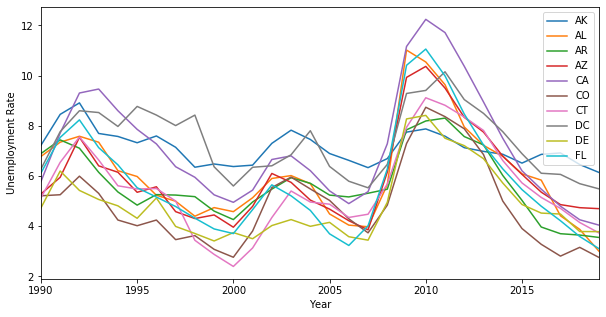

In [24]:
# Rotated version of the table above to make it more plottable
plotSUETable = pd.DataFrame(index = list(range(1990, 2020)))
for state in listStates:
    plotSUETable[state] = stateUnemployment[state]
plotSUETable

# Slicing by column
firstTenStates = plotSUETable.loc[:, listStates[0]:listStates[9]]
graphFirstTen = firstTenStates.plot(figsize = (10, 5))
graphFirstTen.set_xlabel("Year")
graphFirstTen.set_ylabel("Unemployment Rate")


Text(0, 0.5, 'Unemployment Rate')

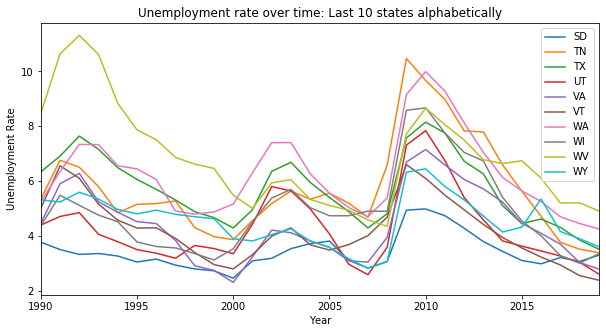

In [25]:
# Last ten states (alphabetically) plotted
lastTenStates = plotSUETable.loc[:, listStates[-10]:listStates[-1]]
graphLastTen = lastTenStates.plot(figsize = (10,5), 
                                  title = 'Unemployment rate over time: Last 10 states alphabetically')
graphLastTen.set_xlabel("Year")
graphLastTen.set_ylabel("Unemployment Rate")

In [16]:
# Plotting the data over time

# Getting first 10 rows
firstTenYears = plotSUETable.head(10)
firstTenYears


,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1990,7.221092,6.775423,6.891546,5.279909,5.775176,5.208628,5.126533,6.275918,4.725948,6.115859,...,3.770667,5.343716,6.331180,4.394974,4.461243,5.002379,5.244271,4.372907,8.467031,5.308838
1991,8.453865,7.345290,7.435840,5.946661,7.711518,5.250826,6.542060,7.763982,6.195779,7.534933,...,3.499043,6.757859,6.909921,4.706672,5.902607,6.555239,6.349566,5.481178,10.639703,5.237810
1992,8.910939,7.580382,7.104672,7.540433,9.304521,5.990388,7.551699,8.597341,5.422387,8.233945,...,3.322336,6.504419,7.640378,4.846830,6.278352,6.100785,7.334815,5.112682,11.313378,5.591165
1993,7.692360,7.343262,6.145644,6.401967,9.463046,5.306053,6.634720,8.526354,5.062173,7.127991,...,3.356180,5.794021,7.155082,4.058174,5.240959,5.156694,7.327337,4.756120,10.617194,5.341607
1994,7.573402,6.209025,5.361175,6.147297,8.598206,4.242644,5.606951,7.972125,4.808135,6.442089,...,3.264075,4.842613,6.485884,3.785767,4.860763,4.570241,6.553920,4.515499,8.835380,4.964256
1995,7.322438,5.976834,4.836642,5.348846,7.856419,4.015930,5.478909,8.769849,4.312184,5.529551,...,3.044908,5.150412,6.056879,3.496749,4.519282,4.284861,6.442373,3.777731,7.863701,4.801908
1996,7.592881,5.230464,5.255626,5.567988,7.276163,4.242511,5.498856,8.426184,5.121942,5.158495,...,3.153444,5.177055,5.697024,3.367572,4.447460,4.293780,6.054201,3.611364,7.506996,4.936795
1997,7.141991,4.992039,5.237702,4.576779,6.367454,3.461324,5.000160,8.006890,3.987131,4.781070,...,2.931225,5.272490,5.308456,3.183334,3.829894,3.906360,4.904300,3.559291,6.860762,4.784717
1998,6.347131,4.394997,5.174342,4.302510,5.946879,3.622534,3.435713,8.424060,3.706883,4.318449,...,2.792318,4.298031,4.881619,3.648786,2.908282,3.394381,4.792833,3.352614,6.617393,4.697757
1999,6.475689,4.738192,4.598890,4.445179,5.246658,3.075051,2.874044,6.363616,3.408379,3.887889,...,2.723373,3.970625,4.665372,3.536648,2.741962,2.952280,4.872426,3.122842,6.460861,4.625549


RANKED UNEMPLOYMENT BY STATE: [['NE', 3.2269574377219494], ['ND', 3.310249249446633], ['SD', 3.415083333668653], ['IA', 3.9714327242632472], ['VT', 4.2091065444247], ['NH', 4.2369247653007704], ['UT', 4.26994171448093], ['VA', 4.400824420126278], ['MN', 4.435318027867994], ['HI', 4.436995841741369], ['WY', 4.560057662137835], ['KS', 4.622541824847144], ['OK', 4.74142612054244], ['CO', 4.861672137438731], ['WI', 4.914384350545292], ['DE', 4.920467948885475], ['MD', 5.026628328527376], ['MT', 5.146183161724185], ['ID', 5.267809768745485], ['MA', 5.348601679156671], ['ME', 5.381344423491466], ['IN', 5.397216858442516], ['MO', 5.488681410432031], ['CT', 5.514410531473784], ['AR', 5.6865560181851835], ['TX', 5.700801522517739], ['NC', 5.706957838702173], ['TN', 5.733791851131878], ['GA', 5.756423356736866], ['PA', 5.777036321055343], ['FL', 5.825426320900964], ['OH', 5.939031024452199], ['AZ', 5.948369303992974], ['NJ', 5.997901722167743], ['AL', 6.079734850980567], ['NM', 6.098602833274056

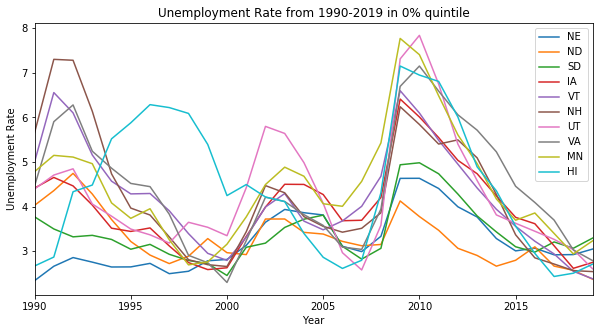

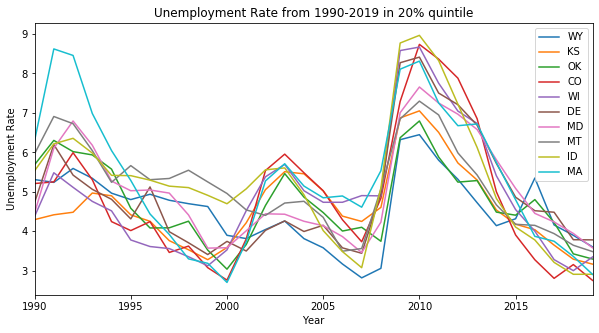

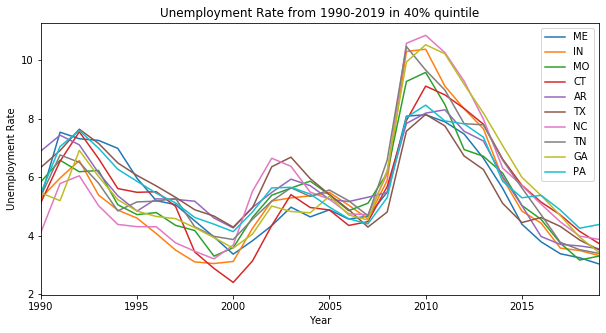

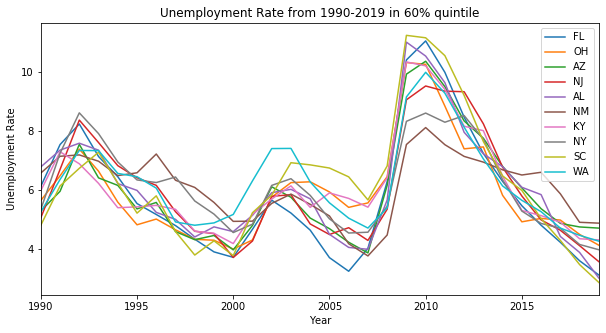

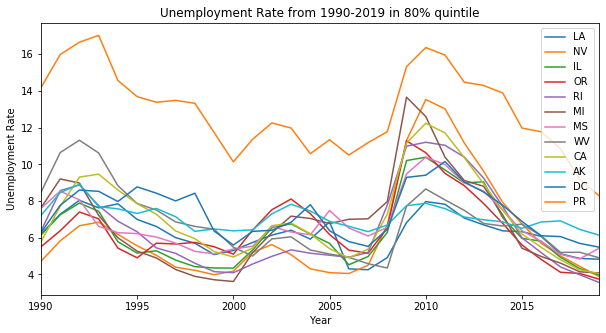

In [48]:
# OVERARCHING TASK: Graphing the 10 states with the lowest unemployment rate averages

# Relevant lists: unemployedAverage, rankingAverage
sortedUnemployedAverage = sorted(unemployedAverage, key = lambda pair: pair[1]) # Sort based on latter element
sortedRankingAverage = sorted(rankingAverage, key = lambda pair: pair[1]) # Again, sorted based on latter element
print('RANKED UNEMPLOYMENT BY STATE: ' + str(sortedUnemployedAverage))
print('AVERAGE RANKING BY STATE: ' + str(sortedRankingAverage))

# Divide the states into approximate quintiles (1-10, 11-20, 21-30, 31-40, 41-52) by ranking & unemployed avearge
qUTStates = []
qRTStates = []
for i in range(5):
    qUStates = []
    qRStates = []
    if (i == 4):
        for j in range(12):
            qUStates.append(sortedUnemployedAverage[i * 10 + j][0])
            qRStates.append(sortedRankingAverage[i * 10 + j][0])
    else: 
        for j in range(10):
            qUStates.append(sortedUnemployedAverage[i * 10 + j][0])
            qRStates.append(sortedRankingAverage[i * 10 + j][0])
    qUTStates.append(qUStates)
    qRTStates.append(qRStates)

print('QUINTILED AVERAGE UNEMPLOYMENT: ' + str(qUTStates))
print('QUINTILED AVERAGE RANKINGS: ' + str(qRTStates))


# Graphing and segmenting each quintile--using the average unemployment rate
for i in range(5):
    q = i * 20
    qCols = plotSUETable[qUTStates[i]]
    qPlot = qCols.plot(figsize = (10, 5),
                       title = 'Unemployment Rate from 1990-2019 in ' + str(q) + '% quintile')
    qPlot.set_xlabel("Year")
    qPlot.set_ylabel("Unemployment Rate")

